In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

%matplotlib inline

In [70]:
df=pd.read_csv("airqi.csv")
df

C:\Users\Pravin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning:

Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.



,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [4]:
df.tail()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
df.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [77]:
df.shape

(435742, 13)

In [78]:
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [8]:
df.nunique()

stn_code                        803
sampling_date                  5485
state                            37
location                        304
agency                           64
type                             10
so2                            4197
no2                            6864
rspm                           6065
spm                            6668
location_monitoring_station     991
pm2_5                           433
date                           5067
dtype: int64

In [79]:
df['state'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Uttar Pradesh',
       'Uttarakhand', 'Uttaranchal', 'West Bengal',
       'andaman-and-nicobar-islands', 'Lakshadweep', 'Tripura'],
      dtype=object)

#cleaning dataset

In [80]:
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [82]:
#drop columns that are not required 
airqi=df.drop(['stn_code', 'agency', 'sampling_date', 'location_monitoring_station'], axis=1)
#drop row where no date is available
df = df.dropna(subset=['date'])



df.state = df.state.replace({'Uttaranchal':'Uttarakhand'})
df.state[df.location == "Jamshedpur"] = df.state[df.location == 'Jamshedpur'].replace({"Bihar":"Jharkhand"})

<ipython-input-82-48787b1fd1e9>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [83]:
airqi.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01


In [84]:
#defining columns of importence,which will be use reguarly
value_cols = ['so2','no2','rspm','spm','pm2_5']

In [85]:
#check null value is remain or not
airqi.isnull().sum()


state            0
location         0
type          5390
so2          34643
no2          16230
rspm         40219
spm         237380
pm2_5       426421
date             0
dtype: int64

In [86]:
airqi.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01


In [87]:
airqi.tail()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
435734,West Bengal,ULUBERIA,RIRUO,20.0,44.0,148.0,NaN,NaN,2015-12-15
435735,West Bengal,ULUBERIA,RIRUO,17.0,44.0,131.0,NaN,NaN,2015-12-18
435736,West Bengal,ULUBERIA,RIRUO,18.0,45.0,140.0,NaN,NaN,2015-12-21
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,NaN,NaN,2015-12-24
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,NaN,NaN,2015-12-29


dataset is now clean no null value

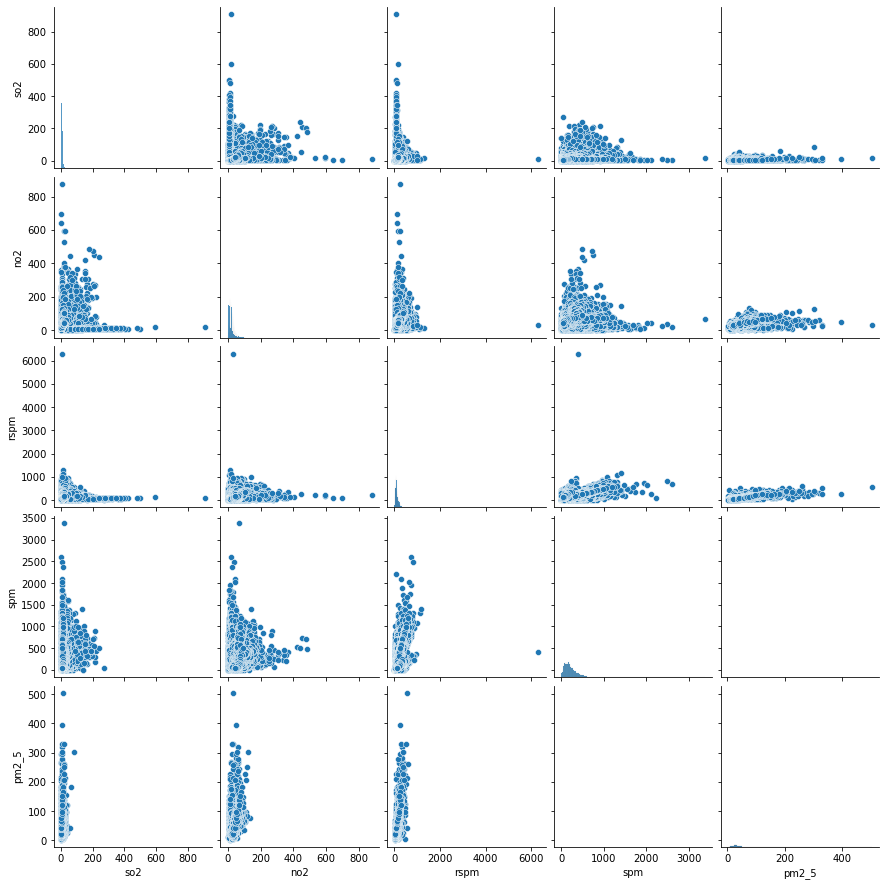

In [88]:
#relationship analysis

sns.pairplot(airqi)

C:\Users\Pravin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='so2', ylabel='Density'>

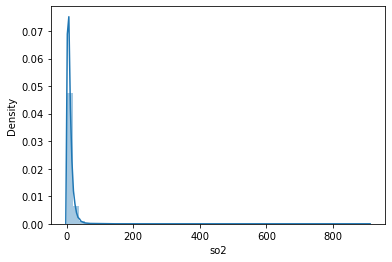

In [89]:
sns.distplot(airqi['so2'])

C:\Users\Pravin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='no2', ylabel='Density'>

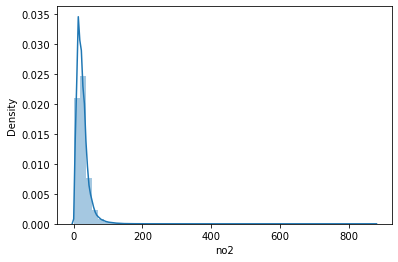

In [90]:
sns.distplot(airqi['no2'])

C:\Users\Pravin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='rspm', ylabel='Density'>

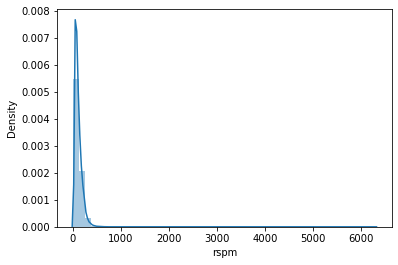

In [91]:
sns.distplot(airqi['rspm'])


C:\Users\Pravin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='spm', ylabel='Density'>

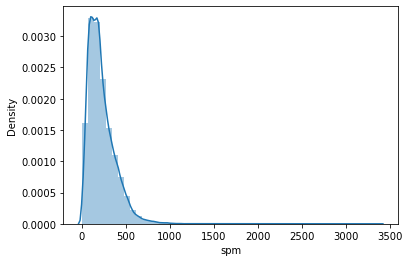

In [92]:
sns.distplot(airqi['spm'])

C:\Users\Pravin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='pm2_5', ylabel='Density'>

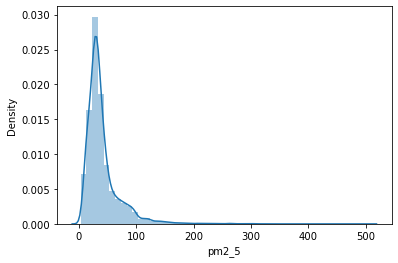

In [93]:
sns.distplot(airqi['pm2_5'])

C:\Users\Pravin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Pravin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Pravin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Pravin\anaconda3\lib\site

<AxesSubplot:xlabel='spm', ylabel='Density'>

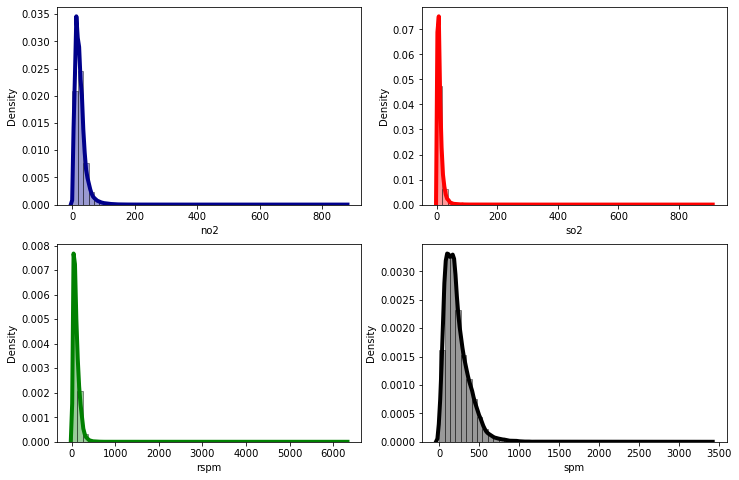

In [94]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))
sns.distplot(airqi['no2'],hist=True,kde=True,
             color='darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4},
             ax=axarr[0][0])

sns.distplot(airqi['so2'],hist=True,kde=True,
             color='red',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4},
             ax=axarr[0][1])

sns.distplot(airqi['rspm'],hist=True,kde=True,
             color='green',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4},
             ax=axarr[1][0])

sns.distplot(airqi['spm'],hist=True,kde=True,
             color='black',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4},
             ax=axarr[1][1])



<AxesSubplot:>

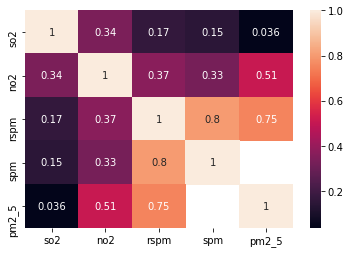

In [95]:
sns.heatmap(
    airqi.loc[:, ['state','so2', 'no2', 'rspm', 'spm', 'pm2_5']].corr(),
    annot=True
)

 From the correlations, spm and rspm show a high value, followed by that of rspm and NO2.







# Grouping the emmissions by state

  Having looked at the pollutants distributions, we now would focus on how these emmissions are stacked across the indian states. We will use groupby on the dataset DataFrame and store it in another DataFrame as statewise_emmissions.

<AxesSubplot:xlabel='state'>

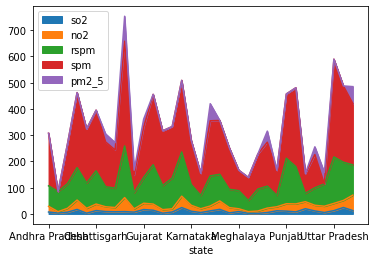

In [99]:
statewise_emmissions = airqi.groupby('state').mean()[['so2', 'no2', 'rspm', 'spm', 'pm2_5']]
statewise_emmissions.plot.area()

The highest emmissions are for spm, for each of the states.

In [97]:
#Getting the statistics for highest emmissions, when grouped statewise
statewise_emmissions.describe()

,so2,no2,rspm,spm,pm2_5
count,33.000000,33.000000,33.000000,31.000000,10.000000
mean,10.011112,22.708406,100.130393,194.522083,44.877515
std,5.942670,12.020303,41.577970,84.333240,23.444821
min,2.059736,5.469697,32.000000,67.254193,18.855612
25%,5.418609,14.793691,73.749431,139.496433,29.790737
50%,8.939587,21.601202,91.870202,196.221053,36.466892
75%,12.608766,26.981127,123.705176,239.212725,59.660200
max,24.435054,59.075731,196.639771,399.402088,95.113208


In [98]:
Top10states_with_highest_So2=statewise_emmissions.sort_values(by='so2',ascending=False).head(10)
Top10states_with_highest_So2_sorted=Top10states_with_highest_So2.loc[:,['so2']]
Top10states_with_highest_So2_sorted.head()

,so2
state,
Uttarakhand,24.435054
Jharkhand,24.115908
Sikkim,19.800000
Maharashtra,17.367064
Bihar,17.125915


Uttarakhand  and Jharkand right at the top.
            
            Importantly, there are no states from South India.

In [ ]:
Top10States_with_highest_No2=statewise_emmissions.sort_values(by='no2',ascending=False).head(10)
Top10States_with_highest_No2_sorted=Top10States_with_highest_No2.loc[:,['no2']]
Top10States_with_highest_No2_sorted.head()

West Bengal and Delhi show the highest NO2 emmissions over the years.


In [ ]:
Top10states_with_highest_rspm=statewise_emmissions.sort_values(by='rspm',ascending=False).head(10)
Top10states_with_highest_rspm_sorted=Top10states_with_highest_rspm.loc[:,['rspm']]
Top10states_with_highest_rspm_sorted.head()

Delhi and Uttar Pradesh show the highest RSPM 

In [ ]:
Top10states_with_highest_spm=statewise_emmissions.sort_values(by='spm',ascending=False).head(10)
Top10states_with_highest_spm_sorted=Top10states_with_highest_spm.loc[:,['spm']]
Top10states_with_highest_spm_sorted.head()

The distribution for spm is generally on the higher side, but Delhi and Uttar Pradesh show the highest presence of suspended Particulate matter.



In [ ]:
Top10states_with_highest_pm2_5=statewise_emmissions.sort_values(by='pm2_5',ascending=False).head(10)
Top10states_with_highest_pm2_5_sorted=Top10states_with_highest_pm2_5.loc[:,['pm2_5']]
Top10states_with_highest_pm2_5_sorted.head()

Delhi still shows highest measured value of pm2_5.

In [ ]:
#Getting the statistics citywise for the pollutants
locationwise_emmissions=airqi.groupby('location').mean()[['so2','no2','rspm','spm','pm2_5']]

In [ ]:
Top10Cities_with_highest_So2=locationwise_emmissions.sort_values(by='so2',ascending=False).head(10)
Top10Cities_with_highest_So2_sorted=Top10Cities_with_highest_So2.loc[:,['so2']]
Top10Cities_with_highest_So2_sorted.head()

In [ ]:
Top10Cities_with_highest_NO2=locationwise_emmissions.sort_values(by='no2',ascending=False).head(10)
Top10Cities_with_highest_NO2_sorted=Top10Cities_with_highest_NO2.loc[:,['no2']]
Top10Cities_with_highest_NO2_sorted.head()

In [ ]:
Top10Cities_with_highest_rspm=locationwise_emmissions.sort_values(by='rspm',ascending=False).head(10)
Top10Cities_with_highest_rspm_sorted=Top10Cities_with_highest_rspm.loc[:,['rspm']]
Top10Cities_with_highest_rspm_sorted.head()

In [ ]:
Top10Cities_with_highest_spm=locationwise_emmissions.sort_values(by='spm',ascending=False).head(10)
Top10Cities_with_highest_spm_sorted=Top10Cities_with_highest_spm.loc[:,['spm']]
Top10Cities_with_highest_spm_sorted.head()

In [ ]:
Top10Cities_with_highest_pm2_5=locationwise_emmissions.sort_values(by='pm2_5',ascending=False).head(10)
Top10Cities_with_highest_pm2_5_sorted=Top10Cities_with_highest_pm2_5.loc[:,['pm2_5']]
Top10Cities_with_highest_pm2_5_sorted.head()

In [23]:
#Visualising the emmissions according to the type and getting the relevant statistics
type_emmissions=airqi.groupby('type').mean()[['so2','no2','rspm','spm','pm2_5']]
type_emmissions.head()

,so2,no2,rspm,spm,pm2_5
type,,,,,
Industrial,27.130601,37.864767,NaN,302.955752,NaN
Industrial Area,13.212287,29.171192,121.495900,226.474079,44.106987
Industrial Areas,13.765723,29.991727,123.028427,249.227238,NaN
RIRUO,10.912577,31.779908,103.617331,NaN,37.816291
Residential,15.227778,19.492857,NaN,274.717105,NaN


C:\Users\Pravin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pravin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pravin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pravin\anaconda3\li

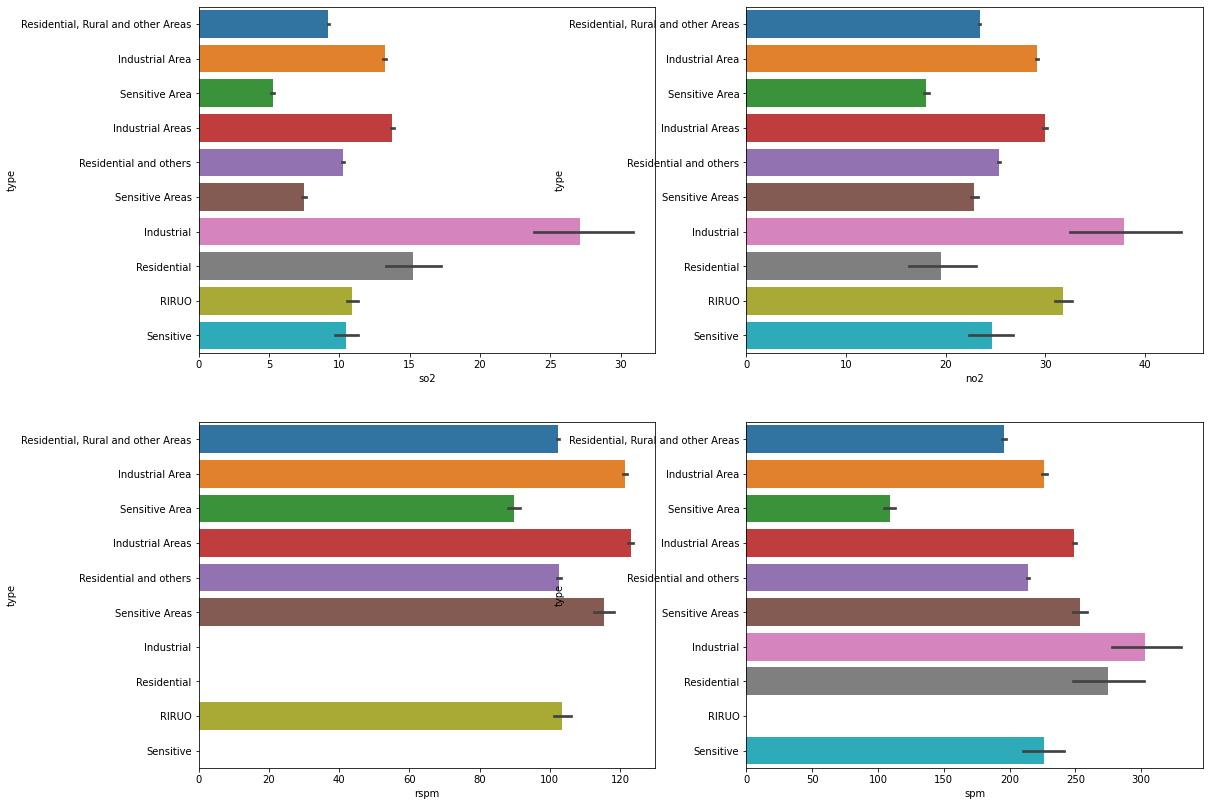

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(18,14))
ax = sns.barplot("so2", y="type",
                 data=airqi,
                 ax=axes[0,0]
                )
ax = sns.barplot("no2", y="type",
                 data=airqi,
                 ax=axes[0,1]
                )
ax = sns.barplot("rspm", y="type",
                 data=airqi,
                 ax=axes[1,0]
                )
ax = sns.barplot("spm", y="type",
                 data=airqi,
                 ax=axes[1,1]
                )

          Largely it is the Industrial affluents that contribute highest percentage of all the pollutants in India.

In [25]:
#Understanding the emmissions with time
airqi['date'].describe()

count         435735
unique          5067
top       2015-03-19
freq             253
Name: date, dtype: object

There are exactly seven missing date values and as we can see there are multiple measurements for the same date.
While dropping the missing dates might seem easiest, we might loose out on some important information.
  

         #Therefore, we will fix this by filling in the missing values by the most frequent values.

In [26]:
airqi.head()
common_value_date='2015-03-19'
airqi['date']=airqi['date'].fillna(common_value_date)
airqi.tail()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,NaN,NaN,2015-12-24
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,NaN,NaN,2015-12-29
435739,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-03-19
435740,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-03-19
435741,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-03-19


In [27]:
#Visualising the Emmissions over the years, by grouping the dataset datewise and creating a new DataFrame for each of the five listed pollutants.

datewise_emmissions_SO2=airqi.groupby('date').mean()['so2']
datewise_emmissions_NO2=airqi.groupby('date').mean()['no2']
datewise_emmissions_rspm=airqi.groupby('date').mean()['rspm']
datewise_emmissions_spm=airqi.groupby('date').mean()['spm']



<AxesSubplot:xlabel='date'>

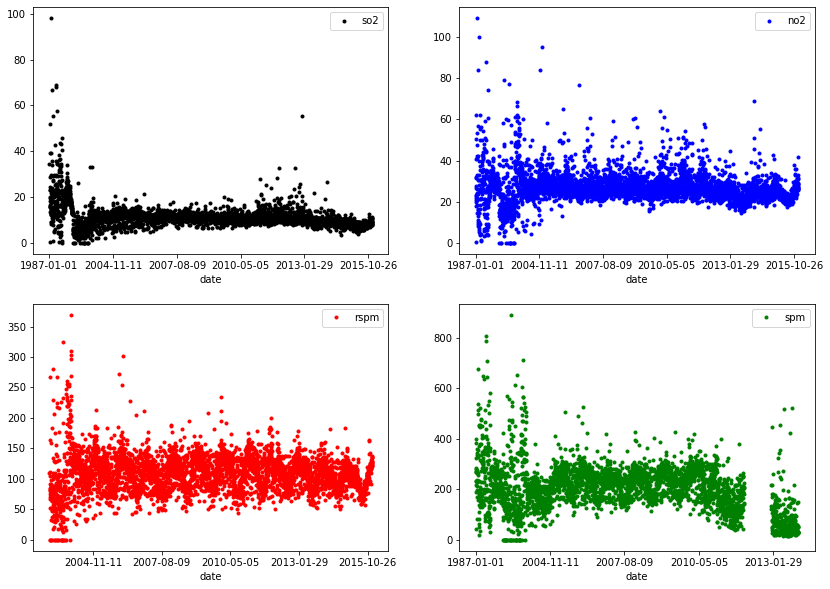

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(14,10))
datewise_emmissions_SO2.plot(style='k.',legend=True,ax=axes[0,0])
datewise_emmissions_NO2.plot(style='b.',legend=True,ax=axes[0,1])
datewise_emmissions_rspm.plot(style='r.',legend=True,ax=axes[1,0])
datewise_emmissions_spm.plot(style='g.', legend=True,ax=axes[1,1])

1.So2 emmissions it appears showed a lot of variable readings in the 1990's when the measurements started, but since, the emmissions have been localised within a range and even started showing slight downward trend lately.

2.NO2 emmissions it appears shows higher variations in the emmissions readings across India.

3.Largely distributed within a certain range of values over the years, although rspm emmissions should be investigated by the different times of year.

4.The spm measurements early in the 1990's showed huge spikes

   #The good part is the gradual reduction in spm presence in India's atmosphere, but missing data recently really doen not help in further investigation.

In [29]:


#As it can be seen now, the date column is converted into datetime, instead of an object. This method is useful for 
#anlysing trends with time within the dataset

airqi['date'] = pd.to_datetime(airqi.date, format='%Y-%m-%d')
airqi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   state     435742 non-null  object        
 1   location  435739 non-null  object        
 2   type      430349 non-null  object        
 3   so2       401096 non-null  float64       
 4   no2       419509 non-null  float64       
 5   rspm      395520 non-null  float64       
 6   spm       198355 non-null  float64       
 7   pm2_5     9314 non-null    float64       
 8   date      435742 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 29.9+ MB


In [30]:
#Making the date column as the index of the dataframe to make plotting and visulaisation easier.
airqi=airqi.set_index('date')
airqi.head()

,state,location,type,so2,no2,rspm,spm,pm2_5
date,,,,,,,,
1990-02-01,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN
1990-02-01,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN
1990-02-01,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN
1990-03-01,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN
1990-03-01,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN


Resampling the dataset,

yearly


monthly

weekly

daily. We will resample by taking the mean of all the measurements within the resampling timeframe, i.e. 'yearly', 'monthly' etc and consequently store each of the results in separate dataframes.

In [31]:
yearly = airqi.resample('Y').mean()

monthly=airqi.resample('M').mean()

weekly=airqi.resample('W').mean()

daily=airqi.resample('D').mean()

<AxesSubplot:title={'center':'Daily Emmissions'}, xlabel='date'>

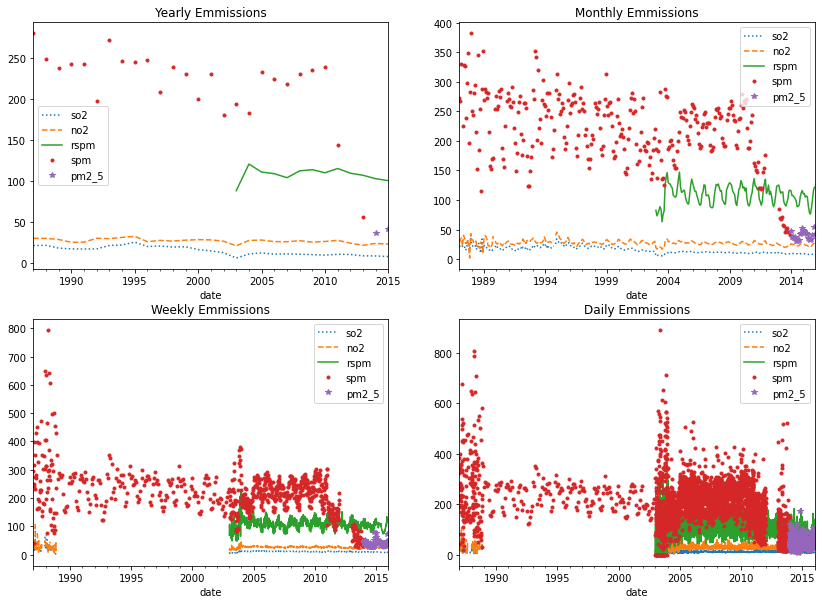

In [32]:
#All the above dataframes will be grouped together and plotted together in a sinlge frame using subplots.

fig,axes=plt.subplots(nrows=2,ncols=2, figsize=(14,10))
yearly.plot(style=[':', '--', '-','.','*'],
            ax=axes[0,0],
            title='Yearly Emmissions')

monthly.plot(style=[':', '--', '-','.','*'],
             ax=axes[0,1],
             title='Monthly Emmissions')

weekly.plot(style=[':', '--', '-','.','*'],
            ax=axes[1,0],
            title='Weekly Emmissions')

daily.plot(style=[':', '--', '-','.','*'],
            ax=axes[1,1],
            title='Daily Emmissions')

The most important thing to note here is the sudden increase in spm emmissions after 2003 (Daily Emmissions plot), indicating of some spm emmission mode that increased drastically in India. It would be very useful to check for some resource online that indicates a change in the environment policy around 2003, specifically towards spm measurements.



<AxesSubplot:title={'center':'Daily Emmissions Distribution'}>

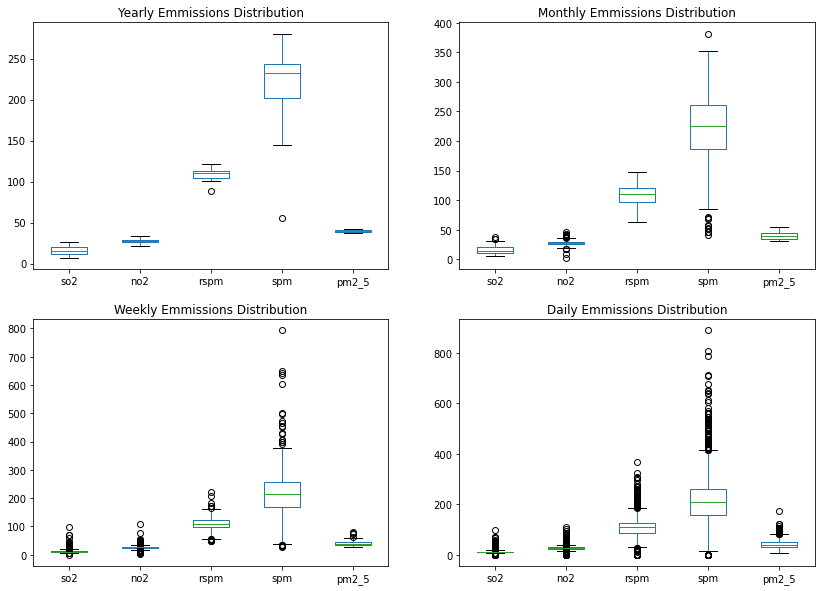

In [33]:
#Putting together all the emissions data, datewise and visualising the data distributions, outliers and median values
fig,axes2=plt.subplots(nrows=2,ncols=2, figsize=(14,10))
yearly.plot.box(
                ax=axes2[0,0],
                title='Yearly Emmissions Distribution')

monthly.plot.box(
                ax=axes2[0,1],
                title='Monthly Emmissions Distribution')

weekly.plot.box(
                ax=axes2[1,0],
                title='Weekly Emmissions Distribution')

daily.plot.box(
                ax=axes2[1,1],
                title='Daily Emmissions Distribution')

the daily emmissions distributions shows a high number of outliers for spm measurements.

  Getting the statistics out of each of the yearly merged datasets. The idea is to get a firsthand understanding of whether the years with highest pollutant emmisions have any relation to the changing evironment policy structures or the growth in the industrial and vehicular presence

In [ ]:
Top5Years_highest_SO2=yearly.sort_values(by='so2', ascending=False).head(5)
Top5Years_highest_SO2.loc[:,'so2']

In [ ]:
Top5Years_highest_NO2=yearly.sort_values(by='no2', ascending=False).head(5)
Top5Years_highest_NO2.loc[:,'no2']

In [ ]:
Top10Years_highest_spm=yearly.sort_values(by='spm', ascending=False).head(10)
Top10Years_highest_spm.loc[:,'spm']

In [ ]:
Top10Years_highest_rspm=yearly.sort_values(by='rspm', ascending=False).head(10)
Top10Years_highest_rspm.loc[:,'rspm']

The most identifiable trend here, is that 'rspm' measurements have increased dratically after 2000, while all the other three pollutants were recorded highest in 1980s and 1990s.

In [ ]:
#Getting the statistics out of each of the monthly merged datasets
Top10Months_highest_SO2=monthly.sort_values(by='so2', ascending=False).head(10)
Top10Months_highest_SO2.loc[:,'so2']

In [ ]:
Top10Months_highest_NO2=monthly.sort_values(by='no2', ascending=False).head(10)
Top10Months_highest_NO2.loc[:,'no2']

In [ ]:
Top20Months_highest_spm=monthly.sort_values(by='spm', ascending=False).head(20)
Top20Months_highest_spm.loc[:,'spm']

In [ ]:
Top20Months_highest_rspm=monthly.sort_values(by='rspm', ascending=False).head(20)
Top20Months_highest_rspm.loc[:,'rspm']

SO2 emmissions demonstrate highest occurence during the winter season in India and that is espeiaaly true for rspm measurements.

#Most importantly, rspm level increase in the winters needs a cross examination with the prevelant winter activities like crop cutting etc. Other than these defingin trends, much less can be inferred about spm measurements with seasonal changes, indicating other potential sources of pollution.

# Apply ML Algorithms

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from pandas_visual_analysis import VisualAnalysis

In [12]:
airqi.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'pm2_5',
       'date'],
      dtype='object')

In [13]:
airqi.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [14]:
airqi.isnull().sum()

state            0
location         3
type          5393
so2          34646
no2          16233
rspm         40222
spm         237387
pm2_5       426428
date             7
dtype: int64

In [15]:
#remove null value
airqiCleaned=airqi.dropna()
airqiCleaned.isnull().sum()

state       0.0
location    0.0
type        0.0
so2         0.0
no2         0.0
rspm        0.0
spm         0.0
pm2_5       0.0
date        0.0
dtype: float64

In [16]:
airqi.dtypes

state        object
location     object
type         object
so2         float64
no2         float64
rspm        float64
spm         float64
pm2_5       float64
date         object
dtype: object

In [68]:
from pandas_visual_analysis import VisualAnalysis
VisualAnalysis(airqi)

In [17]:
airqi.corr()

,so2,no2,rspm,spm,pm2_5
so2,1.000000,0.340555,0.165325,0.148325,0.035980
no2,0.340555,1.000000,0.369923,0.326170,0.509357
rspm,0.165325,0.369923,1.000000,0.801752,0.754709
spm,0.148325,0.326170,0.801752,1.000000,NaN
pm2_5,0.035980,0.509357,0.754709,NaN,1.000000


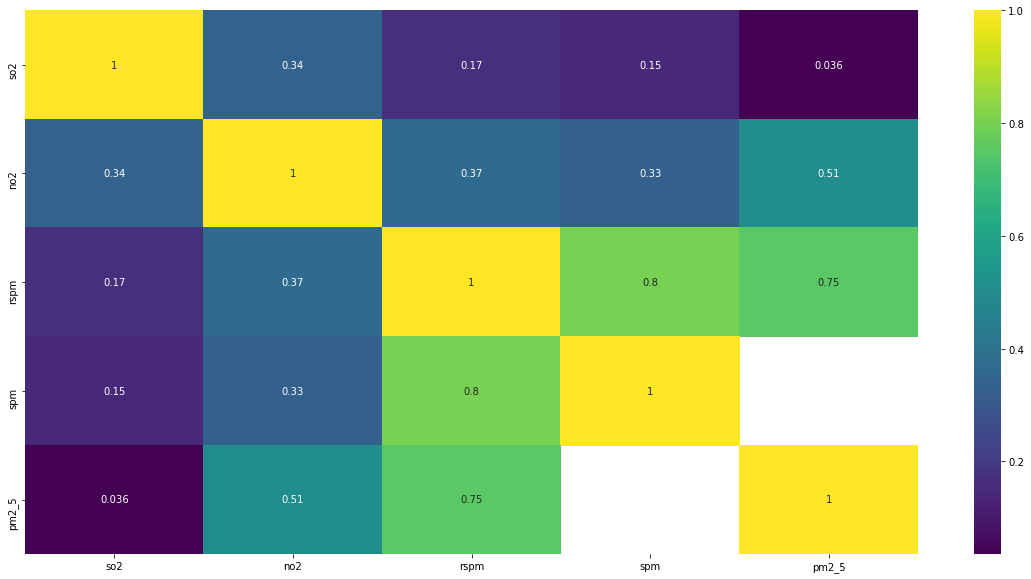

In [23]:
corrmat=airqi.corr()
top_corr_feature=corrmat.index
plt.figure(figsize=(20,10))
g=sns.heatmap(airqi[top_corr_feature].corr(),annot=True,cmap='viridis')

In [18]:
#Function to calculate so2 individual pollutant index(si)
def calculate_si(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    if (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    if (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    if (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/800)
    if (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    if (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
airqi['si']=airqi['so2'].apply(calculate_si)
df= airqi[['so2','si']]
df.head()

,so2,si
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


In [19]:
#Function to calculate no2 individual pollutant index(ni)
def calculate_ni(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-14)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
airqi['ni']=airqi['no2'].apply(calculate_ni)
df= airqi[['no2','ni']]
df.head()

,no2,ni
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


In [20]:
#Function to calculate no2 individual pollutant index(rpi)
def calculate_(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
airqi['rpi']=airqi['rspm'].apply(calculate_si)
df= airqi[['rspm','rpi']]
df.tail()

,rspm,rpi
435737,143.0,121.000000
435738,171.0,130.333333
435739,NaN,0.000000
435740,NaN,0.000000
435741,NaN,0.000000


In [21]:
#Function to calculate no2 individual pollutant index(spi)
def calculate_spi(spm):
    spi=0
    if(spm<=50):
     spi=spm
    if(spm<50 and spm<=100):
     spi=spm
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)
    elif(spm>350 and spm<=450):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/80)
    return spi
airqi['spi']=airqi['spm'].apply(calculate_spi)
df= airqi[['spm','spi']]
df.tail()

,spm,spi
435737,NaN,NaN
435738,NaN,NaN
435739,NaN,NaN
435740,NaN,NaN
435741,NaN,NaN


In [22]:
#function to calculate the air quality index (AQI) of every data value
#its is calculated as per indian govt standards
def calculate_aqi(si,ni,spi,rpi):
    aqi=0
    if(si>ni and si>spi and si>rpi):
     aqi=si
    if(spi>si and spi>ni and spi>rpi):
     aqi=spi
    if(ni>si and ni>spi and ni>rpi):
     aqi=ni
    if(rpi>si and rpi>ni and rpi>spi):
     aqi=rpi
    return aqi
airqi['AQI']=airqi.apply(lambda x:calculate_aqi(x['si'],x['ni'],x['spi'],x['rpi']),axis=1)
df= airqi[['state','si','ni','rpi','AQI']]
df.head()

,state,si,ni,rpi,AQI
0,Andhra Pradesh,6.000,21.750,0.0,0.0
1,Andhra Pradesh,3.875,8.750,0.0,0.0
2,Andhra Pradesh,7.750,35.625,0.0,0.0
3,Andhra Pradesh,7.875,18.375,0.0,0.0
4,Andhra Pradesh,5.875,9.375,0.0,0.0


In [23]:
airqi.state.unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Uttar Pradesh',
       'Uttarakhand', 'Uttaranchal', 'West Bengal',
       'andaman-and-nicobar-islands', 'Lakshadweep', 'Tripura'],
      dtype=object)

In [24]:
state=pd.read_csv("airqi.csv")
state.head()
df.head()

C:\Users\Pravin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,state,si,ni,rpi,AQI
0,Andhra Pradesh,6.000,21.750,0.0,0.0
1,Andhra Pradesh,3.875,8.750,0.0,0.0
2,Andhra Pradesh,7.750,35.625,0.0,0.0
3,Andhra Pradesh,7.875,18.375,0.0,0.0
4,Andhra Pradesh,5.875,9.375,0.0,0.0


In [25]:
#setting up date parameter
import warnings
import itertools
import dateutil
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline
df=airqi[['AQI','date']]
df["date"] = pd.to_datetime(df['date'])
df.tail(20)

<ipython-input-25-1f5dd547b011>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df['date'])


,AQI,date
435722,0.0,2015-11-05
435723,0.0,2015-11-07
435724,0.0,2015-11-10
435725,0.0,2015-11-11
435726,0.0,2015-11-16
435727,0.0,2015-11-20
435728,0.0,2015-11-26
435729,0.0,2015-11-29
435730,0.0,2015-12-03
435731,0.0,2015-12-06


In [26]:
#preprocessing the data values
data=df.reset_index(level=0, inplace=False)
data = data[np.isfinite(data['AQI'])]
data=data[data.date != '1970-01-31']
data = data.reset_index(drop=True)
data.head()

,index,AQI,date
0,0,0.0,1990-02-01
1,1,0.0,1990-02-01
2,2,0.0,1990-02-01
3,3,0.0,1990-03-01
4,4,0.0,1990-03-01


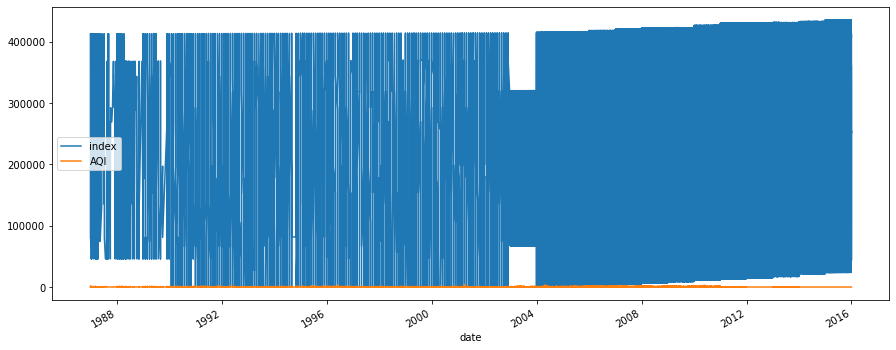

In [27]:
#visualizing the processed data of AQI

df=data.set_index('date')
df.sort_values(by='date',ascending=False)
df.plot(figsize=(15, 6))
plt.show()
y=df.AQI

In [28]:
#spliting dataframes into test and train
n = df.shape[0]
train_size = 0.70

features_dataframe = df.sort_values('date')
train = df.iloc[:int(n * train_size)]
test = df.iloc[int(n * train_size):]

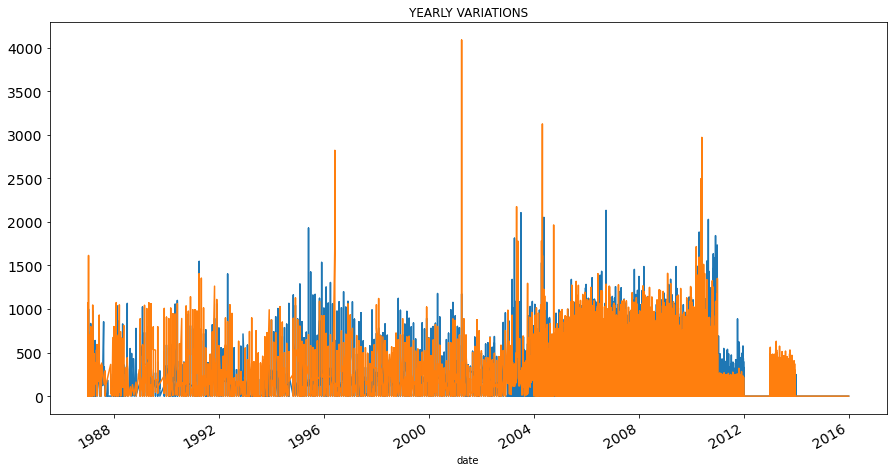

In [29]:
#plotting the yearly variations of AQI

train.AQI.plot(figsize=(15,8), title= 'YEARLY VARIATIONS', fontsize=14)
test.AQI.plot(figsize=(15,8), title= 'YEARLY VARIATIONS', fontsize=14)
plt.show()

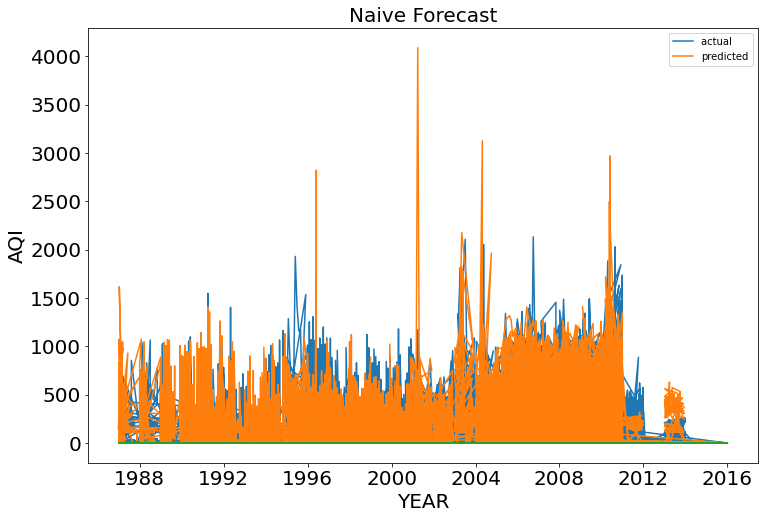

In [30]:
#Naive Forecast Approach to find the variations(trend)

dd= np.asarray(train.AQI)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['AQI'], label='Train')
plt.plot(test.index,test['AQI'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast",fontsize=20)

plt.legend(["actual ","predicted"])
plt.xlabel("YEAR",fontsize=20)
plt.ylabel("AQI",fontsize=20)
plt.tick_params(labelsize=20)
plt.show()

In [31]:
#resampling the data to predict monthly AQI of india

df=data[['AQI','date']]

df['date']=pd.to_datetime(df['date'])
date=df.groupby(pd.Grouper(key='date',freq='1MS'))["AQI"].mean()
df.count()

<ipython-input-31-7be5ac4dae27>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date']=pd.to_datetime(df['date'])


AQI     435742
date    435735
dtype: int64

In [32]:
#splitting the sampling date into month and year accordingly
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data=data[['AQI','date','month','year']]
data.head()

,AQI,date,month,year
0,0.0,1990-02-01,2.0,1990.0
1,0.0,1990-02-01,2.0,1990.0
2,0.0,1990-02-01,2.0,1990.0
3,0.0,1990-03-01,3.0,1990.0
4,0.0,1990-03-01,3.0,1990.0


In [33]:
#predicting JANUARY-AQI across india
data=data[data['month']==1]
data.head()

,AQI,date,month,year
29,164.666667,1991-01-01,1.0,1991.0
30,132.000000,1991-01-01,1.0,1991.0
31,35.875000,1991-01-01,1.0,1991.0
65,303.750000,1992-01-01,1.0,1992.0
66,160.000000,1992-01-01,1.0,1992.0


In [34]:
#Appling BOXPLOT analysis
df = data[['AQI','year']].groupby(["year"]).mean().reset_index().sort_values(by='year',ascending=False)
df=df.dropna()
dd=df
df.describe()

,year,AQI
count,29.000000,29.000000
mean,2001.000000,153.031648
std,8.514693,81.331116
min,1987.000000,0.000000
25%,1994.000000,140.478314
50%,2001.000000,188.977778
75%,2008.000000,206.453106
max,2015.000000,233.807187


<AxesSubplot:xlabel='AQI'>

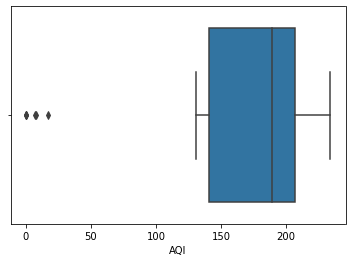

In [35]:
import seaborn as sns
sns.boxplot(x=df['AQI'])

In [36]:
#removing Outliers
df = df[np.isfinite(df['AQI'])]
df=df[df.AQI >153]
df=df[df.AQI <221]

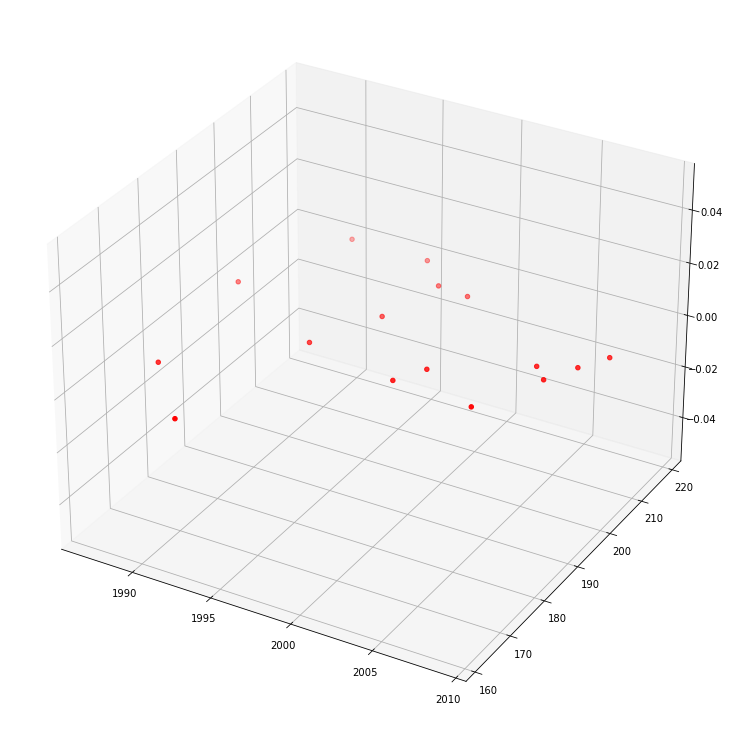

In [37]:
#visualizing the filttered data

year=df['year'].values
AQI=df['AQI'].values
df['AQI']=pd.to_numeric(df['AQI'],errors='coerce')
df['year']=pd.to_numeric(df['year'],errors='coerce')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(year,AQI, color='red')
plt.show()

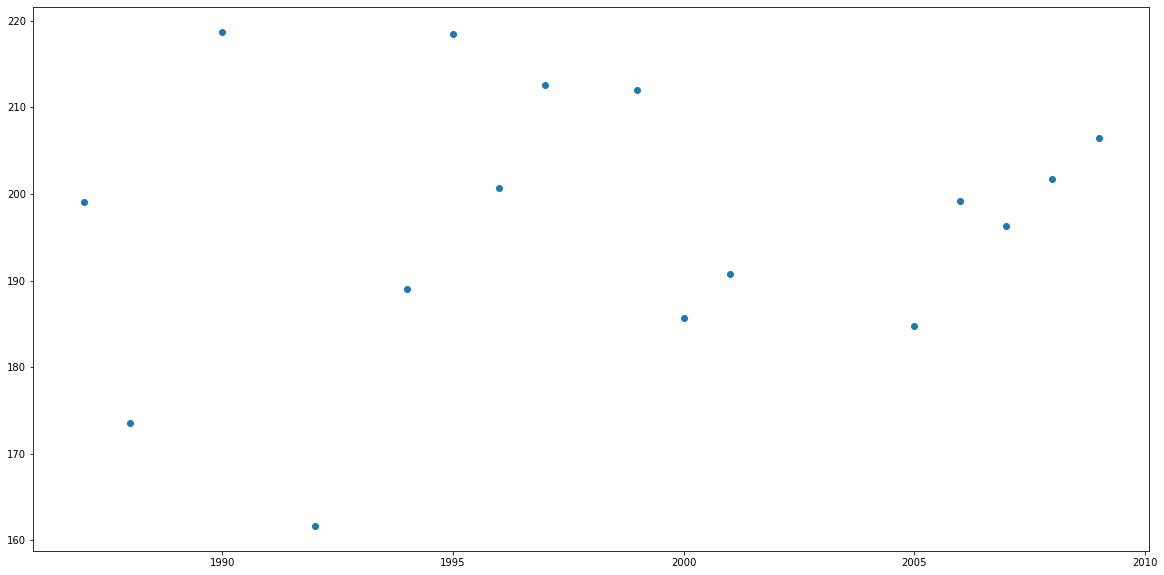

In [38]:
#scatter plot of data points
cols =['year']
y = df['AQI']
x=df[cols]

plt.scatter(x,y)
plt.show()

In [39]:
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]
x

array([[ 1.        ,  1.47555213],
       [ 1.        ,  1.33667664],
       [ 1.        ,  1.19780114],
       [ 1.        ,  1.05892565],
       [ 1.        ,  0.92005015],
       [ 1.        ,  0.36454817],
       [ 1.        ,  0.22567268],
       [ 1.        ,  0.08679718],
       [ 1.        , -0.19095381],
       [ 1.        , -0.3298293 ],
       [ 1.        , -0.4687048 ],
       [ 1.        , -0.60758029],
       [ 1.        , -0.88533128],
       [ 1.        , -1.16308227],
       [ 1.        , -1.44083326],
       [ 1.        , -1.57970875]])

In [40]:
# Applying GRADIENT DESCENT 

alpha = 0.1 #Step size
iterations = 3000 #No. of iterations
m = y.size #No. of data points
np.random.seed(4) #Setting the seed
theta = np.random.rand(2) #Picking random values to start with

def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs
past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]
#Printing the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 196.90, 2.27


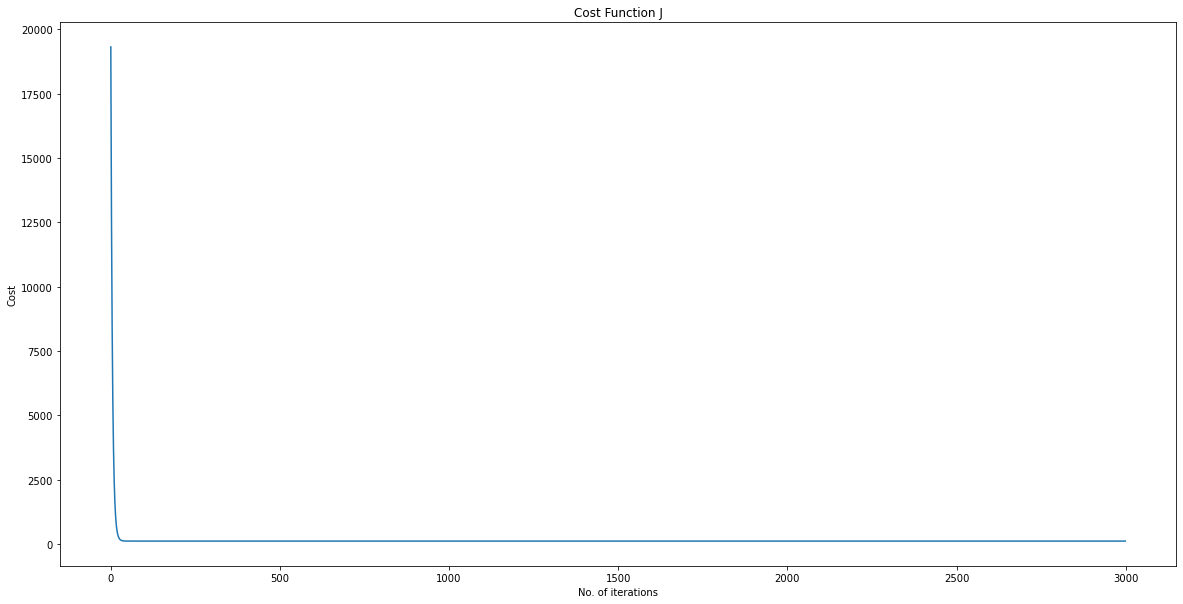

In [41]:
#Plotting the cost function...
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [42]:
#Predicted val
newB=[ 196.90, 2.27]
def rmse(y,y_pred):
    rmse=np.sqrt(sum(y-y_pred))
    return rmse

   
y_pred=x.dot(newB)

dt = pd.DataFrame({'Actual': y, 'Predicted': y_pred})  
x=pd.concat([df, dt], axis=1)
x
x

,year,AQI,Actual,Predicted
22,2009.0,206.453106,206.453106,200.249503
21,2008.0,201.702077,201.702077,199.934256
20,2007.0,196.320359,196.320359,199.619009
19,2006.0,199.143849,199.143849,199.303761
18,2005.0,184.779568,184.779568,198.988514
14,2001.0,190.709538,190.709538,197.727524
13,2000.0,185.637603,185.637603,197.412277
12,1999.0,211.957580,211.957580,197.097030
10,1997.0,212.636190,212.636190,196.466535
9,1996.0,200.657481,200.657481,196.151287


In [43]:
#calculating the root mean squared error for the predicted AQi values
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y,y_pred)))

15.091115230736085


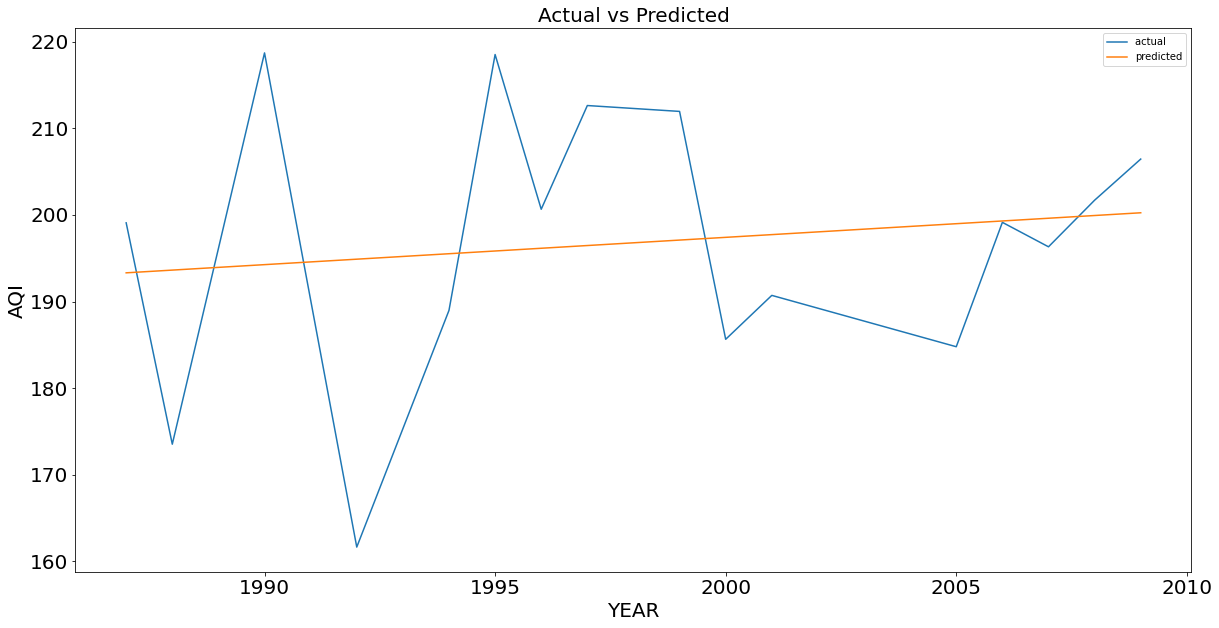

In [44]:
x_axis=x.year
y_axis=x.Actual
y1_axis=x.Predicted
plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis)
plt.title("Actual vs Predicted",fontsize=20)
plt.legend(["actual ","predicted"])
plt.xlabel("YEAR",fontsize=20)
plt.ylabel("AQI",fontsize=20)
plt.tick_params(labelsize=20)
plt.show()

In [45]:
#improving the accuracy by splitting the data on heavy variations

df=dd[['year','AQI']]


#huge variations aqi accures on year 2009-2010 (by moving average graph)
df=df[df.year<2011]
df.describe()

,year,AQI
count,24.000000,24.000000
mean,1998.500000,183.919332
std,7.071068,47.635366
min,1987.000000,8.020461
25%,1992.750000,170.551595
50%,1998.500000,197.704860
75%,2004.250000,212.127233
max,2010.000000,233.807187


<AxesSubplot:xlabel='AQI'>

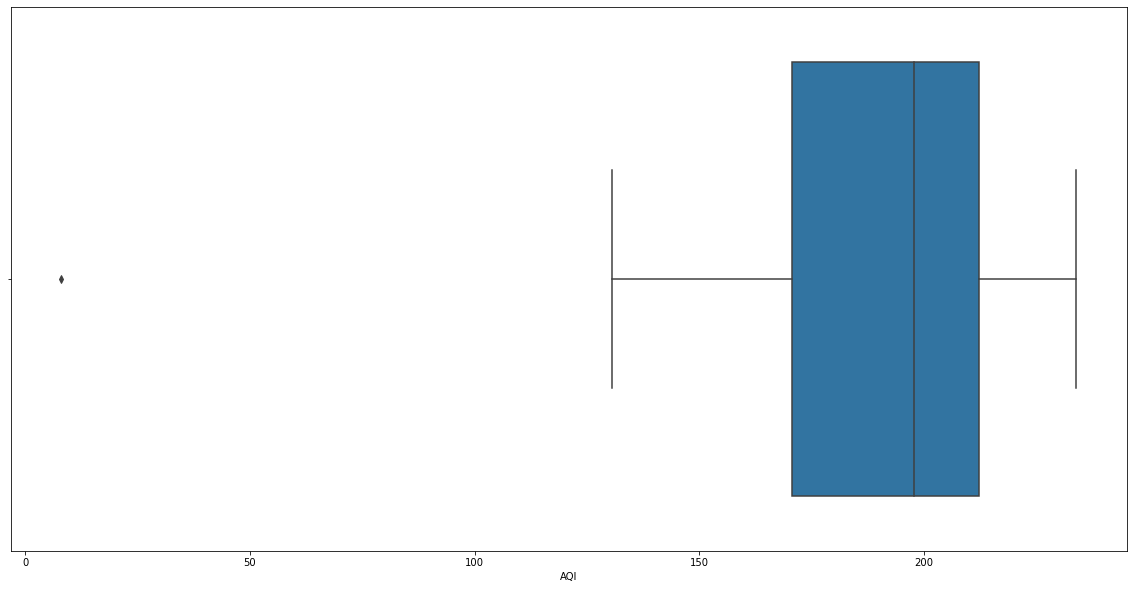

In [46]:
#applying boxplot analysis
import seaborn as sns
sns.boxplot(x=df['AQI'])

In [47]:
#removing outliers
df = df[np.isfinite(df['AQI'])]
df=df[df.AQI >200]
df=df[df.AQI <226]
df

,year,AQI
22,2009.0,206.453106
21,2008.0,201.702077
12,1999.0,211.957580
10,1997.0,212.636190
9,1996.0,200.657481
8,1995.0,218.525980
3,1990.0,218.713889


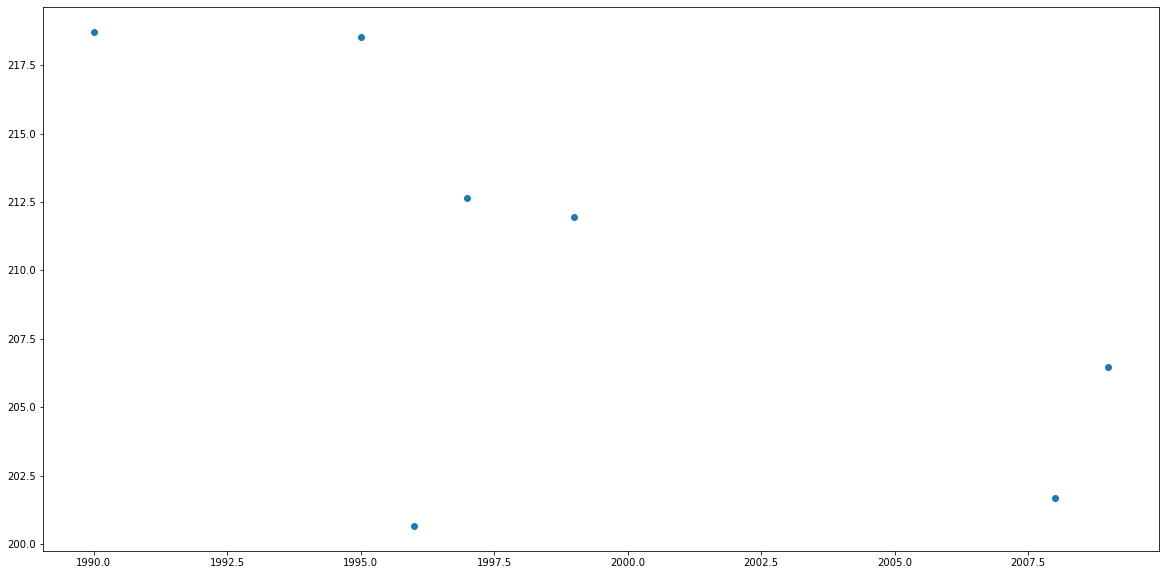

In [48]:
#plotting data points
cols =['year']
y = df['AQI']
x=df[cols]

plt.scatter(x,y)
plt.show()

In [49]:
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]
x

array([[ 1.        ,  1.41575078],
       [ 1.        ,  1.27212389],
       [ 1.        , -0.02051813],
       [ 1.        , -0.30777191],
       [ 1.        , -0.4513988 ],
       [ 1.        , -0.59502569],
       [ 1.        , -1.31316014]])

In [50]:
#Tunning model with GRADIENT DESCENT

alpha = 0.1 #Step size
iterations = 3000 #No. of iterations
m = y.size #No. of data points
np.random.seed(4) #Setting the seed
theta = np.random.rand(2) #Picking some random values to start with

def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 210.09, -4.79


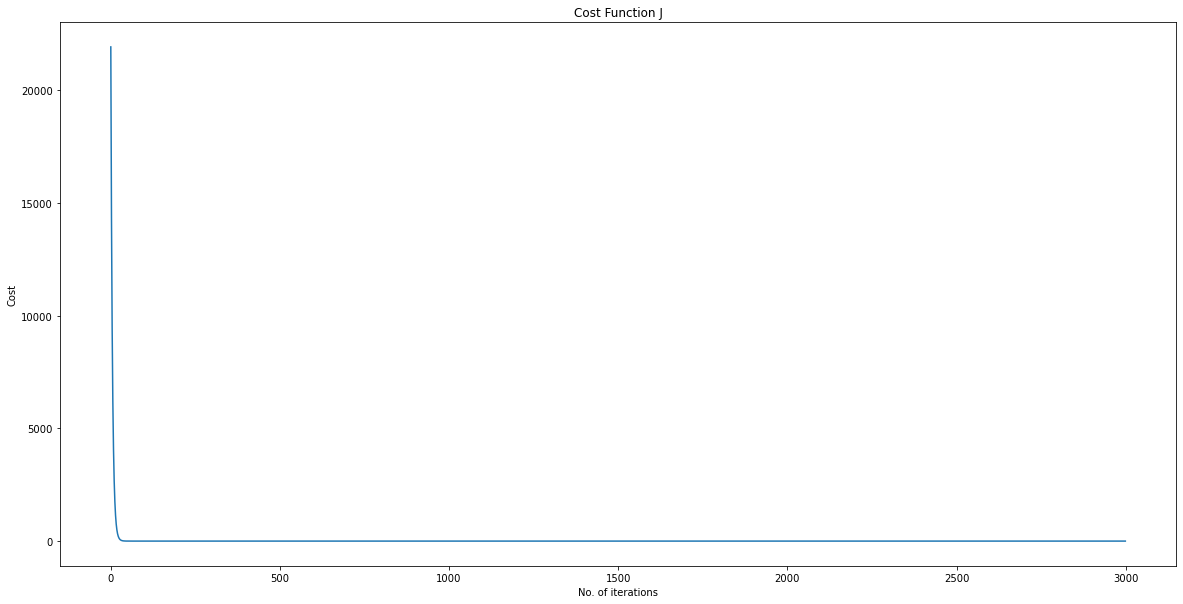

In [51]:
#Plotting the cost function...
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [52]:
#predicting january(1988-2009) AQI across india

import numpy as np
newB=[ 214.47, 1.18]

def rmse(y,y_pred):
    rmse= (np.sqrt(np.mean((y-y_pred)**2)))
    return rmse
   
y_pred=x.dot(newB)
dt = pd.DataFrame({'Actual': y, 'Predicted': y_pred})  
x=pd.concat([df, dt], axis=1)
x

,year,AQI,Actual,Predicted
22,2009.0,206.453106,206.453106,216.140586
21,2008.0,201.702077,201.702077,215.971106
12,1999.0,211.957580,211.957580,214.445789
10,1997.0,212.636190,212.636190,214.106829
9,1996.0,200.657481,200.657481,213.937349
8,1995.0,218.525980,218.525980,213.767870
3,1990.0,218.713889,218.713889,212.920471


In [53]:
#testing the accuracy of the model

from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y,y_pred)))

8.769791059670695


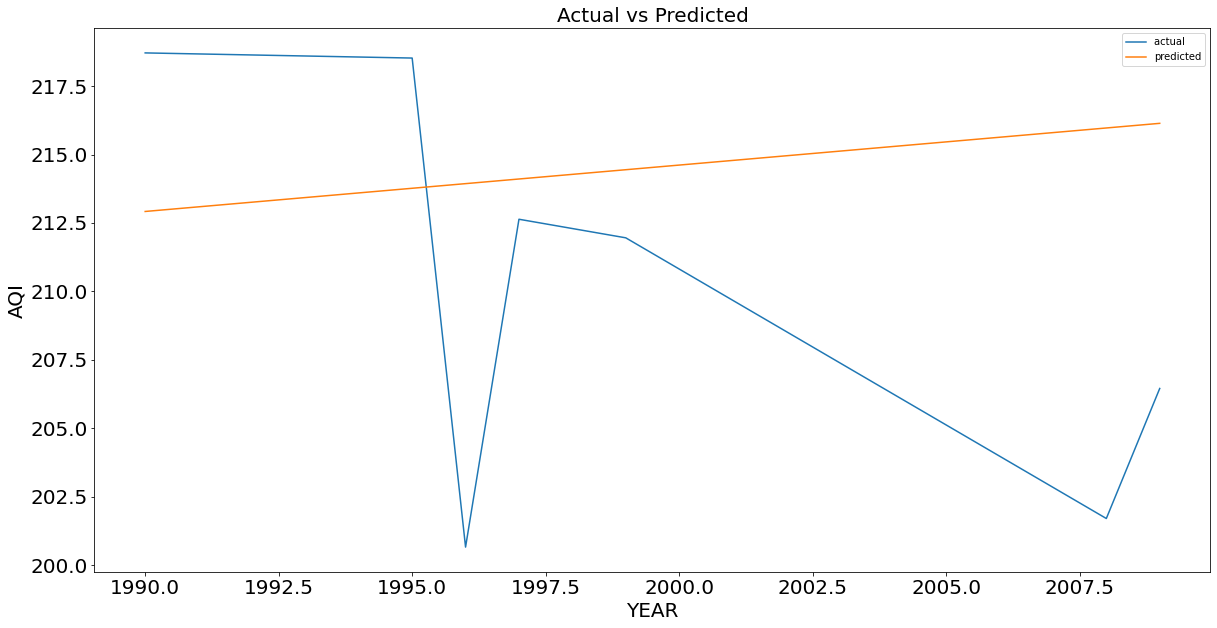

In [54]:
x_axis=x.year
y_axis=x.Actual
y1_axis=x.Predicted
plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis)
plt.title("Actual vs Predicted",fontsize=20)
plt.legend(["actual ","predicted"])
plt.xlabel("YEAR",fontsize=20)
plt.ylabel("AQI",fontsize=20)
plt.tick_params(labelsize=20)
plt.show()

In [55]:
#improving the accuracy by splitting the data on heavy variations

df= dd[['year','AQI']]

#huge variations aqi accures on year 2009-2010 (by moving average graph)
df=df[df.year>2010]
df.describe()

,year,AQI
count,5.000000,5.000000
mean,2013.000000,4.770761
std,1.581139,7.406692
min,2011.000000,0.000000
25%,2012.000000,0.000000
50%,2013.000000,0.000000
75%,2014.000000,6.990550
max,2015.000000,16.863254


<AxesSubplot:xlabel='AQI'>

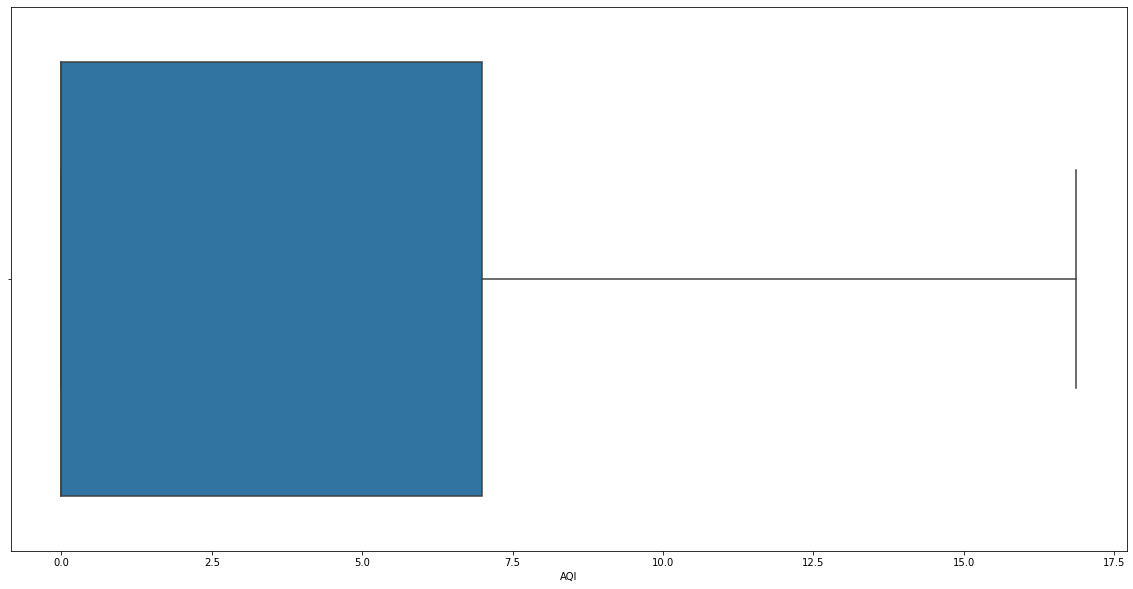

In [56]:
#applying boxplot
import seaborn as sns
sns.boxplot(x=df['AQI'])

In [57]:
df = df[np.isfinite(df['AQI'])]
df=df[df.AQI >101]
df=df[df.AQI <107]
df.head()

,year,AQI


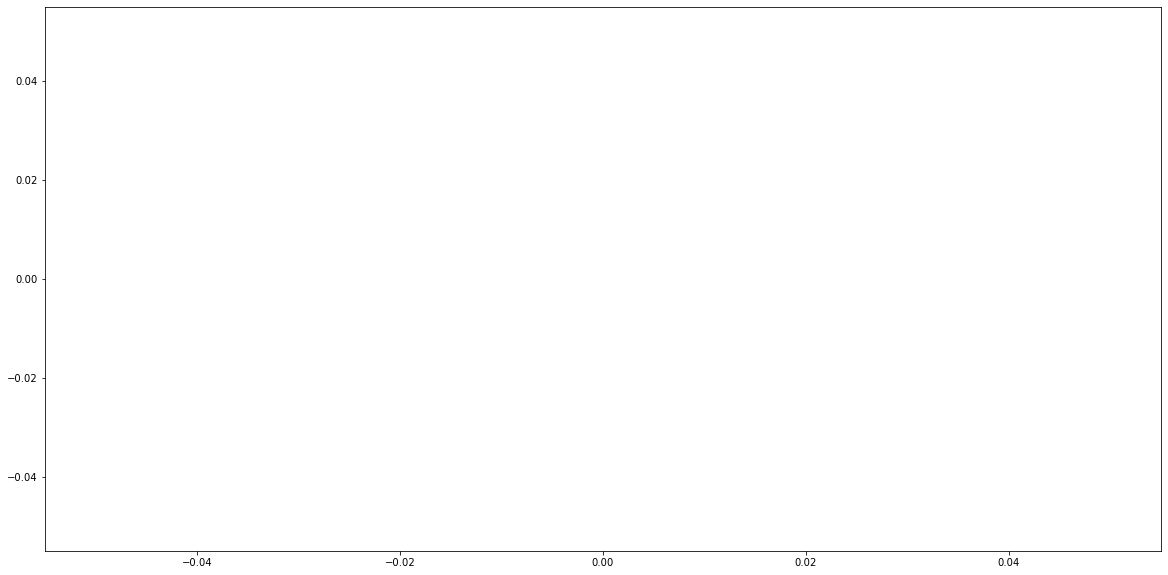

In [58]:
cols =['year']
y = df['AQI']
x=df[cols]

plt.scatter(x,y)
plt.show()

In [59]:
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]
x

array([], shape=(0, 2), dtype=float64)

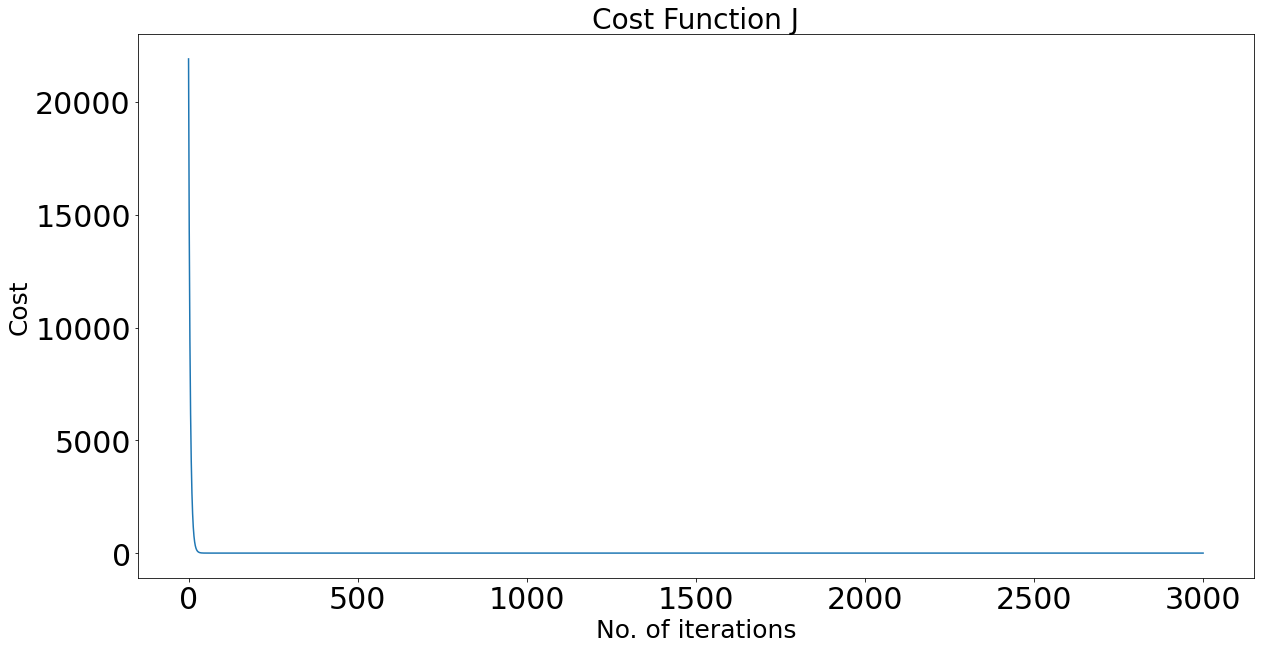

In [79]:
#Plotting the cost function...
plt.title('Cost Function J',fontsize=28)
plt.xlabel('No. of iterations',fontsize=25)
plt.ylabel('Cost',fontsize=25)
plt.plot(past_costs)
plt.tick_params(labelsize=30)
plt.show()

In [62]:
#Prediction for the future 
from sklearn.preprocessing import MinMaxScaler

In [63]:
#feeding in the x value-years
data=[[-1,2016],[-1,2017],[-1,2018],[-1,2019],[-1,2020]]

In [65]:
#normalization
scaler=MinMaxScaler(feature_range=(-1,1))
scaler.fit(data)
x=scaler.transform(data)

In [66]:
#calculations
newB=[103.59,-2.74]
ypred=-(x.dot(newB))

In [67]:
#AQI for the year 2020
print("AQI for the year 2020===>",ypred[-1])

AQI for the year 2020===> 106.33
